In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



df=pd.read_csv('custstories.csv')
df.head()


,Unnamed: 0,cust_id,num_events,top_servicetype,top_calllength,top_location,top_linestatus,freq_top_servicetype,freq_top_calllength,freq_top_location,freq_top_linestatus,uniq_servicetype,uniq_location,min_date,num_days,cust_label
0,0,1000023,1007,11,"(120.0, 2147483647.0]",DATA_USAGE,Active,964,946,964,1007,3,8,01-01-2015,110 days 00:00:00.000000000,"(-2, 0]"
1,1,1000072,151,11,"(120.0, 2147483647.0]",DATA_USAGE,Active,151,133,151,151,1,1,08-01-2015,103 days 00:00:00.000000000,"(-2, 0]"
2,2,1000090,761,11,"(120.0, 2147483647.0]",DATA_USAGE,Active,741,720,741,761,2,4,02-01-2015,103 days 00:00:00.000000000,"(-2, 0]"
3,3,1000119,439,11,"(120.0, 2147483647.0]",DATA_USAGE,Inactive,423,421,423,439,3,3,01-01-2015,69 days 00:00:00.000000000,"(84, 728]"
4,4,1000134,15,7,"(-1.0, 0.0]",AL,Active,15,15,6,15,1,3,18-01-2015,58 days 00:00:00.000000000,"(-2, 0]"


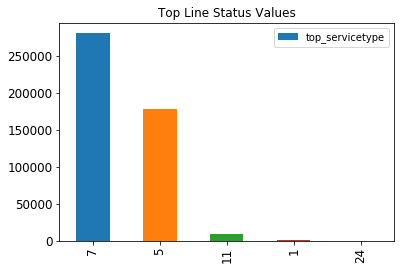

In [26]:
df.top_servicetype.value_counts().plot(kind="bar",title="Top Line Status Values", fontsize =12,legend =True)

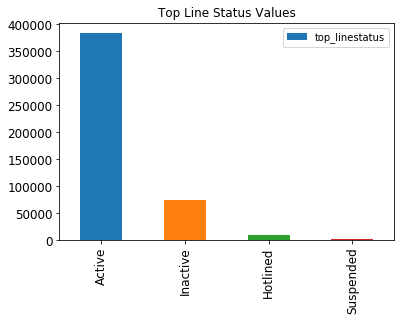

In [3]:
df.top_linestatus.value_counts().plot(kind="bar",title="Top Line Status Values", fontsize =12,legend =True)

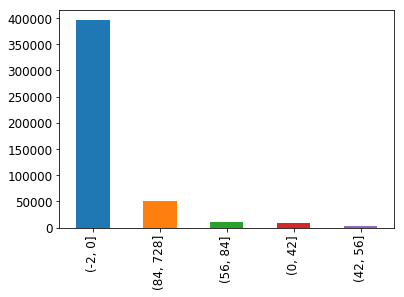

In [4]:
df['cust_label'].value_counts().plot(kind="bar", fontsize =12)

cust_label        (-2, 0]  (0, 42]  (42, 56]  (56, 84]  (84, 728]
top_servicetype                                                  
1                    54.0      NaN       1.0      39.0        1.0
5                152358.0   3083.0     730.0    2414.0    19839.0
7                236816.0   6138.0    1700.0    4947.0    30805.0
11                 6094.0    125.0      26.0    2265.0      461.0
24                    4.0      2.0       NaN       2.0        NaN


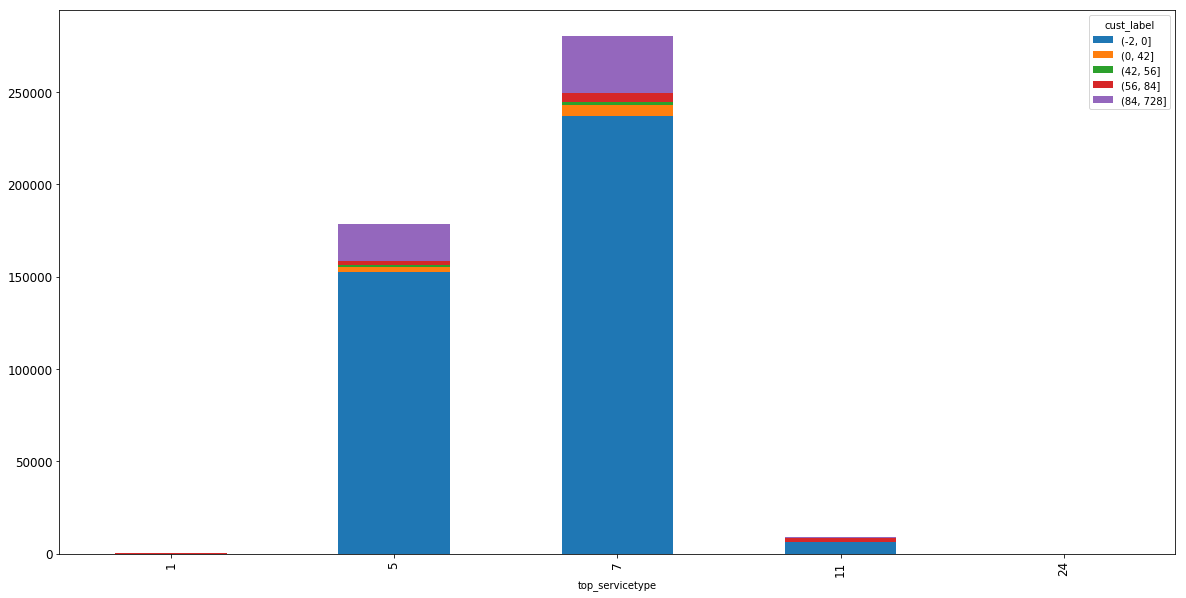

In [6]:
data1=df['cust_label'].groupby(df['top_servicetype']).value_counts().unstack()
print(data1)
data1.plot(kind="bar",stacked=True, fontsize =12,legend =True,figsize=(20,10))

cust_label        (-2, 0]  (0, 42]  (42, 56]  (56, 84]  (84, 728]
top_servicetype                                                  
1                    54.0      NaN       1.0      39.0        1.0
5                152358.0   3083.0     730.0    2414.0    19839.0
7                236816.0   6138.0    1700.0    4947.0    30805.0
11                 6094.0    125.0      26.0    2265.0      461.0
24                    4.0      2.0       NaN       2.0        NaN


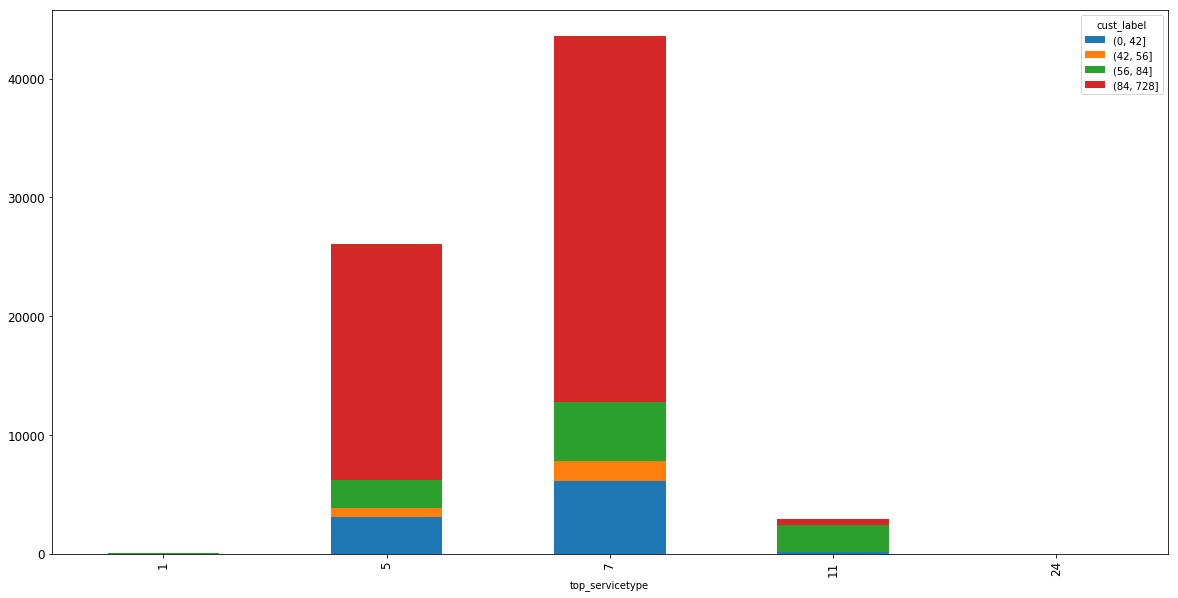

In [7]:
data1=df['cust_label'].groupby(df['top_servicetype']).value_counts().unstack()
print(data1)
data2=data1.iloc[:,1:]
data2.plot(kind="bar",stacked=True, fontsize =12,legend =True,figsize=(20,10))

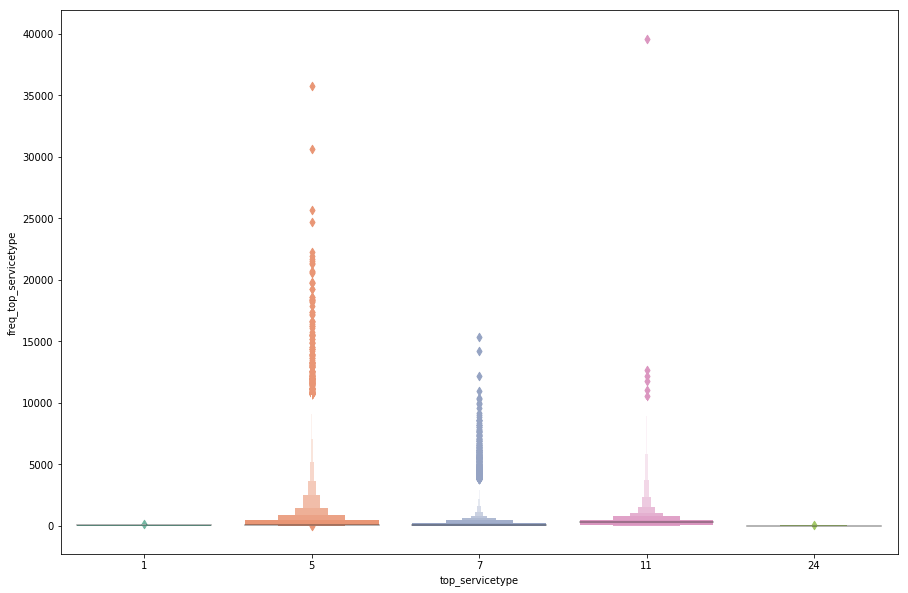

In [52]:
plt.figure(figsize=(15,10))
sns.boxenplot(x='top_servicetype', y='freq_top_servicetype',data=df.loc[(df.top_linestatus =="Active")| (df.top_linestatus == "Hotlined")], palette="Set2")


cust_label        (0, 42]  (42, 56]  (56, 84]  (84, 728]
uniq_servicetype                                        
1                    3472       727      1329       6797
2                    5266      1554      5045      42085
3                     468       118       742       1011
4                     139        55      2507       1203
5                       3         3        44         10


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9053B92E8>,
      dtype=object)

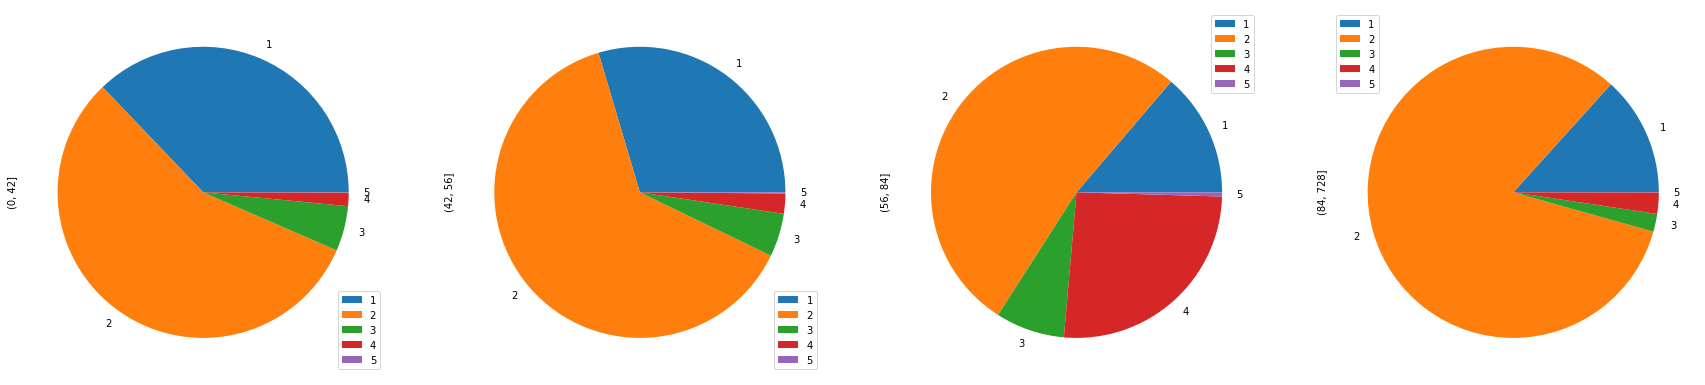

In [35]:
data1=df['cust_label'].groupby(df['uniq_servicetype']).value_counts().unstack()
print(data1.iloc[:,1:])
data1.iloc[:,1:].plot(kind='pie',subplots=True,figsize=(30,60))

In [ ]:
df['min_date']=pd.to_datetime(df['min_date'], dayfirst=True)
df1=df['cust_id'].groupby(df['Month'].dt.strftime("%b")).count()
print(df1)
df1.plot(kind='bar')



top_linestatus     Active  Hotlined  Inactive  Suspended
top_servicetype                                         
1                    26.0      28.0      41.0        NaN
5                146262.0    4944.0   26849.0      369.0
7                231964.0    4036.0   43789.0      617.0
11                 5452.0     553.0    2887.0       79.0
24                    3.0       1.0       4.0        NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022881CEFEF0>,
      dtype=object)

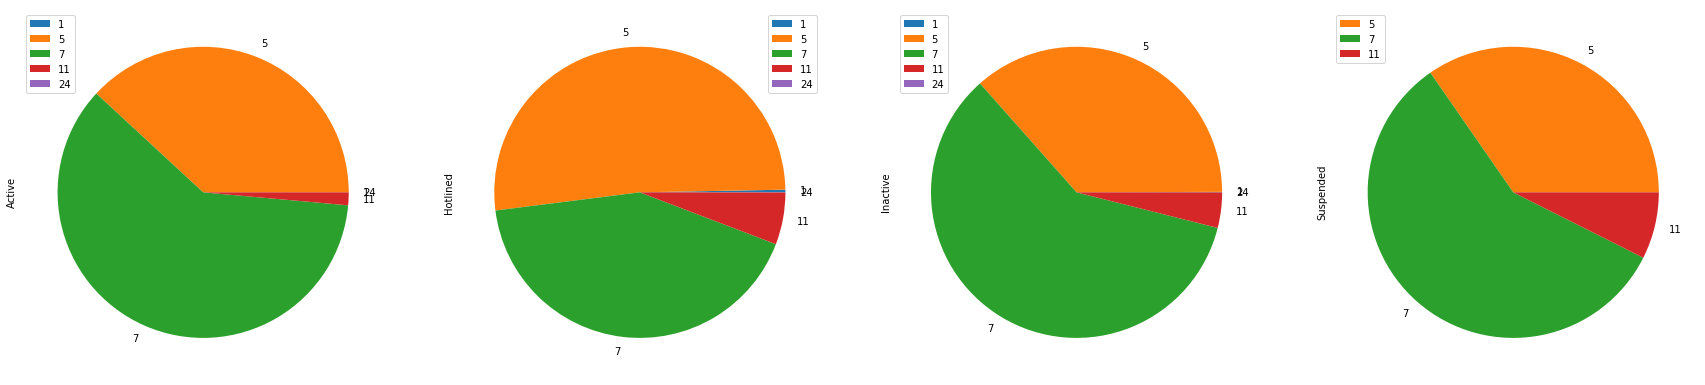

In [82]:
data1=df['cust_id'].groupby([df['top_servicetype'],df['top_linestatus']]).count().unstack()
print(data1)
data1.iloc[(0,1,3,4),:]
data1.plot(kind='pie',subplots=True,figsize=(30,60))